In [50]:
from typing import List, Dict, Tuple

import pandas as pd
import matplotlib.pyplot as plt

__WORKING_BRANCH_PATH = (
    "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch"
)

hatch = {
    'Vector': '////',
    'SkipList': 'OO',
    'HashSkipList': '....',
    'HashLinkList': '---'
}

linestyle = {
    'Vector': '-',
    'SkipList': '-',
    'HashSkipList': '-.',
    'HashLinkList': '..'
}

color = {
    'Vector': 'darkslateblue',
    'SkipList': 'olive',
    'HashSkipList': 'darkred',
    'HashLinkList': 'steelblue'
    # 'Vector': 'black',
    # 'Skip': 'black',
    # 'HashSkipList': 'black',
    # 'HashLinkList': 'black'
}

plt.rcParams["font.family"] = "Arial", "Gulasch", "Times", "Times New Roman", "serif"

alphabets = "abcdefghijklmnopqrstuvwxyz"

In [4]:
def get_exp_dirname(query_type: str, selectivity: float, entry_size: int) -> str:
    return (
        f"{__WORKING_BRANCH_PATH}/experiments-{query_type}-{selectivity}-{entry_size}"
    )


def get_log_file_path(
    query_type: str,
    inserts: int,
    point_queries: int,
    range_queries: int,
    selectivity: float,
    memtable: str,
    entry_size: int,
    number_of_entries_per_page: int,
    number_of_pages: int,
    size_ratio: int = 4,
    updates: int = 0,
):
    return f"{get_exp_dirname(query_type, selectivity, entry_size)}/I {inserts} U {updates} S {range_queries} Y {selectivity} Q {point_queries} m {memtable.lower()} E {entry_size} B {number_of_entries_per_page} P {number_of_pages} T {size_ratio}/workload.log"

In [36]:
def plot_vector_skip_list_range(
    vec_df: pd.DataFrame, skip_df: pd.DataFrame, num: int = 0
):

    fig_size = (5, 3.5)

    if num == 0:
        num = len(vec_df)

    fig, ax = plt.subplots(figsize=fig_size)
    ax.plot(
        vec_df.index[:num],
        vec_df["TimeTaken"][:num] / 1000,
        color=color["Vector"],
        label="vector",
    )
    ax.plot(
        skip_df.index[:num],
        skip_df["TimeTaken"][:num] / 1000,
        color=color["SkipList"],
        label="skiplist",
    )
    ax.set_xlabel("range query number")
    ax.set_ylabel("latency (ms)")
    ax.set_ylim(bottom=0)
    ax.legend()
    plt.show()

In [124]:
def plot_subplots_vector_skip_list_range(
    list_vec_df: List[pd.DataFrame],
    list_skip_df: List[pd.DataFrame],
    titles: List[str],
    annotatepos: List[Dict[str, str]],
    num: int = 0,
):

    fig_size = (10, 3.5)

    if num == 0:
        num = len(list_vec_df[0])

    fig, ax = plt.subplots(1, 2, figsize=fig_size)
    for i in range(len(list_vec_df)):
        ax[i].plot(
            list_vec_df[i].index[:num],
            list_vec_df[i]["TimeTaken"][:num] / 1000,
            color=color["Vector"],
            alpha=0.7,
            label="vector",
        )
        ax[i].plot(
            list_skip_df[i].index[:num],
            list_skip_df[i]["TimeTaken"][:num] / 1000,
            color=color["SkipList"],
            label="skiplist",
        )
        ax[i].set_xlabel("range query number")
        ax[i].set_ylabel("latency (ms)")
        ax[i].set_ylim(bottom=0)
        ax[i].set_title(f"$\mathbf{{(}}\mathbf{{{alphabets[i]}}}\mathbf{{)}}$ " + titles[i])
        x, y, step = annotatepos[i]["x"], annotatepos[i]["y"], annotatepos[i]["step"]
        ax[i].annotate(f"Avg time", xy=(x, y))
        ax[i].annotate(
            f"    vector: {(list_vec_df[i][:num]/1000).mean()['TimeTaken']:.2f} $\mathit{{m}}s$",
            xy=(x + 4, y - step),
        )
        ax[i].annotate(
            f"    skip list: {(list_skip_df[i][:num]/1000).mean()['TimeTaken']:.2f} $\mathit{{m}}s$",
            xy=(x + 4, y - step * 2),
        )

        ax[i].legend()

    plt.show()

In [26]:
def prepare_dataframe(log_file_path: str, key: str="RangeQueryTime: ") -> pd.DataFrame:
    ff = open(log_file_path, "r")
    range_quereis = []

    for line in ff.readlines():
        if key in line:
            range_quereis.append(float(line.split(" ")[1]))
    
    return pd.DataFrame(range_quereis, columns=["TimeTaken"])


findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not fo

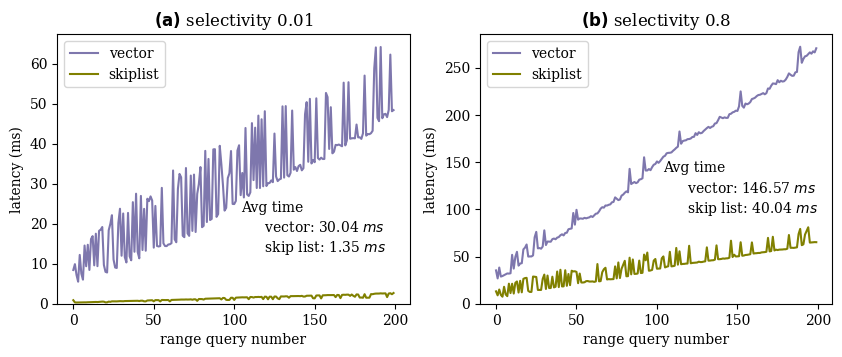

In [125]:
query_type = "RQ-VEC-SKIP"
entry_size = 64
memtables = ["Vector", "SkipList"]
inserts = 140000
point_queries = 0
range_queries = 200
number_of_entries_per_page = 64
number_of_pages = 4096
updates = 0

selectivities = [0.01, 0.8]
list_vec_df = []
list_skip_df = []
titles = []

for selectivity in selectivities:
    vec_log_file_path = get_log_file_path(
        query_type,
        inserts,
        point_queries,
        range_queries,
        selectivity,
        memtables[0],
        entry_size,
        number_of_entries_per_page,
        number_of_pages,
    )

    skip_log_file_path = get_log_file_path(
        query_type,
        inserts,
        point_queries,
        range_queries,
        selectivity,
        memtables[1],
        entry_size,
        number_of_entries_per_page,
        number_of_pages,
    )

    vec_df = prepare_dataframe(vec_log_file_path, "RangeQueryTime: ")
    skip_df = prepare_dataframe(skip_log_file_path, "RangeQueryTime: ")

    list_vec_df.append(vec_df)
    list_skip_df.append(skip_df)
    titles.append(f"selectivity {selectivity}")

    # plot_vector_skip_list_range(vec_df, skip_df, range_queries)

annotatepos = [
    {"x": 104, "y": 23, "step": 5},
    {"x": 104, "y": 140, "step": 22},
]

plot_subplots_vector_skip_list_range(list_vec_df, list_skip_df, titles, annotatepos, range_queries)